In [ ]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import time
import scipy.signal
import random

# GAME OF LIFE 

Nous sommes ravis de vous présenter notre premier projet en Python.

Le but de ce projet était de construire un Jeu de La Vie ou "Game of Life" afin de mettre en pratique nos connaissances. 

Nous avons travaillé dur pendant un mois et demi en respectant un ***plan de travail structuré*** qui vous serra présenté ci-dessous. 

Dans un premier temps, il a fallut mettre en place une ***organisation***. Cela nous a permit de respecter les deadlines tout en travaillant sur le projet de façons ***constante***. 
Ainsi, nous avons privilégier une première réunion de ***préconception*** pour éviter de nous lancer tête baissée dans le projet. 
Au cours de cette préconception nous nous sommes reparti les tâches selon les envies et les facilités de chacun. 
Nous avons également mis en place un document partagé et un Discord pour suivre les avancées du projet en continu. 
Chacun était libre de poser des questions et nous sommes resté soudé pour permettre au projet de voir le jour. 
De plus, nous avons choisi de mettre en place un ***projet GitHub*** afin de mettre en commun tous les dossiers crée. Cela a permit à chacun de tester le code et de suivre son avancement. 

Après avoir mis en place notre plan de travail nous avons commencé le codage. 
Il était necessaire pour nous de commencer par créer le jeu en console avant de l implémenter sous forme graphique. 

## A. Moteur de Jeu: 

### La Grille :
Pour cela on a créer une ***classe Grille()*** contenant des méthodes permettant son actualisation. 
* On doit définir pour chaque cellule de la grille ses cellules voisines et leur état = morte ou vivante. 
Ici une cellule correspondra à une case de la grille elle est donc définit par ***self.grille2D[lignes][colonnes]*** 
Chaque cellule est également définit par la classe ***Cellule()*** qui permet de définir l'état de chaque cellule dans la grille. 

In [ ]:
def find_voisin(self): 
    list_voisins = []

    for lignes in range(-1, 2): 
        for colonnes in range(-1,2): 
            voisin_ligne = self.grille2D[lignes] + lignes
            voisin_colonne = self.grille2D[colonnes] + colonnes 

            voisin_OK = True 
            if (voisin_ligne) == self.grille2D[lignes] and (voisin_colonne) == self.grille2D[colonnes]: 
                voisin_OK = False
            if (voisin_ligne) < 0 or (voisin_colonne)>= self.colonnes: 
                voisin_OK = False
            if (voisin_colonne) < 0 or (voisin_ligne) >= self.lignes: 
                voisin_OK = False 
        
            if voisin_OK : 
                list_voisins.append(self.grille2D[voisin_ligne][voisin_colonne])
    return list_voisins  

2 - Après avoir determiner le nombre de cellules voisines de chaque cellule en stockant leur état dans 2 listes distinctes on va finalement faire évoluer la grille en fonction des 3 règles du jeu. 
  - on créer 2 listes pour stocker les cellules vivantes et mortes
  - on parcours la grille en modifiant l'état des cellulles en fonction des 3 règles.  

Les règles du jeu sont les suivantes : 
* 1 cellule vivante survit si elle à 2 ou 3 voisins vivants
* 1 cellule vivante meurt de solitude ou de surpopulation
* 1 cellule morte peut devenir vivante si elle à exactement 3 voisins vivants


In [ ]:
def update_board(self): 

        list_vivantes = []
        list_mortes = []

        for lignes in range (len(self.grille2D)): 
            for colonnes in range(len(self.grille2D[lignes])): 
                find_voisin = self.find_voisin(lignes, colonnes)
                nb_voisin_alive = []
                
                for cell_voisine in find_voisin : 
                    if cell_voisine.check_actual_state(): 
                        nb_voisin_alive.append(cell_voisine)

                cell = self.grille2D[lignes][colonnes]
                etat_cell = cell.check_actual_state()

                if etat_cell == True : 
                    if len(nb_voisin_alive) == 2 or len(nb_voisin_alive) == 3: 
                        list_vivantes.append(cell)
                    if len(nb_voisin_alive) < 2 or len(nb_voisin_alive) > 3:
                        list_mortes.append(cell)
                else: 
                    if len(nb_voisin_alive) == 3: 
                        list_vivantes.append(cell)
        for cellule in list_vivantes: 
            cellule.state == 1
        for cellule in list_mortes:
            cellule.state == 0 

### Initialiser une grille aléatoirement

Pour initialiser la grille aléatoirement la grille on utilise la bibliothèque random de python et on genère une grille complète contenant des 0 et des 1 de façons aléatoire avec la fonction ***random.randint()***. 
Nous avons aussi mis en place une boucle pour faire évoluer la grille manuellement en pressant ENTRER. 

In [ ]:
nb_colonnes = 50
nb_lignes = 50

grille2D = [[0 for _ in range(nb_colonnes)] for _ in range(nb_lignes)]

def build_grille(grille2D):
    for ligne in grille2D:
        for colonne in ligne:
            alea = random.randint(0, 2)
            if alea == 1:
                grille2D[ligne][colonne] = 1

Voici le résultat obtenu à la console pour l'affichage d'une grille aléatoire de 30x30 : 


![](image/jeu_console.png)

Une fois la grille fonctionnelle, nous allons maintenant nous concentrer sur l'affichage de notre jeu en utilisant les fonctions aupréalablement créer. 

## B. Partie interface

***ATTENTION !*** 
Pour éviter un problème ou un bug nous devons ABSOLUEMENT vérifier que la taille entrée est bien un entier réel positif. 
Nous avons donc utilisé la ***méthode du blindage***. 

Il faudra aussi caster le nombre en entier car tout ce qui est entrée au clavier est forcément considéré par défaut comme un string (chaîne de caractère). 

# Blindage

In [ ]:
def run(self):
    choix_loop = True
    while choix_loop:
        for event in pygame.event.get():
                if event.key == pygame.K_RETURN:
                    try:
                        selected_size = int(self.game_menu.user_input)
                        print(
                            f"Taille de la grille sélectionnée : {selected_size}x{selected_size}"
                        )
                        if selected_size >= 50:
                            self.game_menu.selected_action = None
                            self.game_menu.start_selected = False
                            self.game_menu.playing = True
                            choix_loop = False

                if event.key == pygame.K_BACKSPACE:
                    self.game_menu.user_input = self.game_menu.user_input[:-1]

                if event.key in (
                    pygame.K_0,
                    pygame.K_1,
                    pygame.K_2,
                    pygame.K_3,
                    pygame.K_4,
                    pygame.K_5,
                    pygame.K_6,
                    pygame.K_7,
                    pygame.K_8,
                    pygame.K_9,
                ):
                    self.game_menu.user_input += event.unicode


        pygame.display.flip()

# Affichage

In [ ]:
def transition_between_state(self):
        if self.update:
                self.game.update_board()
                self.draw_board()
                self.draw_button()

In [ ]:
def draw_button(self):
    self.screen.blit(self.button_play_image, self.button_play_rect)
    self.screen.blit(self.button_pause_image, self.button_pause_rect)
    self.screen.blit(self.button_save_image, self.button_save_rect)
    self.screen.blit(self.button_load_image, self.button_load_rect)
    self.screen.blit(self.deco_bonnet_image, self.deco_bonnet_rect)
    self.screen.blit(self.deco_pere_noel_image, self.deco_pere_noel_rect)
    self.screen.blit(self.deco_cadeau_image, self.deco_cadeau_rect)


![Affichage des boutons](image/screenshot_buttons.png)

In [ ]:
def draw_board(self):
        self.screen.fill((135, 206, 250))
        
        # Dessin des celulles
        for i in range(self.game.height):
            for j in range(self.game.width):
                if self.game.board[i, j] == 1:
                    pygame.draw.rect(
                        self.screen,
                        (0, 0, 100),
                        (
                            j * self.cell_size + 40,
                            i * self.cell_size + 40,
                            self.cell_size,
                            self.cell_size,
                        ),
                    )

        # Dessin du cadrillage
        for i in range(self.game.height + 1):
            pygame.draw.line(self.screen,(0, 0, 0),(40, i * self.cell_size + 40),(40 + self.game.width * self.cell_size, i * self.cell_size + 40),1)

        for j in range(self.game.width + 1):
            pygame.draw.line(self.screen,(0, 0, 0),(j * self.cell_size + 40, 40),(j * self.cell_size + 40, 40 + self.game.height * self.cell_size),1)


![Affichage de la grille](image/screenshot_grille.png)

# Modifier l'état des cellules

In [ ]:
def update_cell_on_click(self, pos):
    i, j = (pos[1] - 40) // self.cell_size, (pos[0] - 40) // self.cell_size

    if (
        0 <= i < self.game.height
        and 0 <= j < self.game.width
        and not self.placement
    ):
        self.game.board[i, j] = 1 - self.game.board[i, j]
        self.draw_board()   

# Execution automatique

In [ ]:
# Création d'un évènement de clock
CLOCK_EVENT = pygame.USEREVENT + 1
pygame.time.set_timer(CLOCK_EVENT, 300)

def handle_events(self):
    for event in pygame.event.get():
        if event.type == pygame.USEREVENT + 1:
            if self.pause == False:
                self.update = True
                self.transition_between_state()

# Placement de structure complexe

In [ ]:
# positionnement d'une structure complexe
def place_spaceship(self, i, j):
    spaceship = np.array(
        [
            [0, 0, 1, 1, 0, 0, 0],
            [1, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1],
            [0, 1, 1, 1, 1, 1, 1],
        ]
    )

    self.board[i : i + 5, j : j + 7] = spaceship

![Spaceship sur la grille du jeu](image/spaceship.png)

## C. Sauvegarde et Chargement

In [ ]:
def save_to_file(self, filename):
    np.savetxt(filename, self.board, fmt="%d")

def load_from_file(self, filename):
    self.board = np.loadtxt(filename, dtype=int)

## D. Partie Optimisation

In [ ]:
def update_board(self):
    kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    neighbors_count = scipy.signal.convolve2d(
        self.board, kernel, mode="same", boundary="fill", fillvalue=0
    )
    self.board = np.where(
        (self.board == 1) & ((neighbors_count < 2) | (neighbors_count > 3)),
        0,
        np.where(
            (self.board == 1) & ((neighbors_count == 2) | (neighbors_count == 3)),
            1,
            np.where((self.board == 0) & (neighbors_count == 3), 1, self.board),
        ),
    )

In [ ]:
def transition_between_state(self):
    start_time = time.time()
    self.game.update_board()
    end_time = time.time()
    elapsed_time = (end_time - start_time) * 1000
    self.elapsed_time.append(elapsed_time)

### Tests du temps d'exécution pour une matrice de 100x100 générée aléatoirement 100 fois.

résultats : 1ms

In [1]:
import time
import numpy as np
import scipy.signal

def update_board(board):
    kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    neighbors_count = scipy.signal.convolve2d(
        board, kernel, mode="same", boundary="fill", fillvalue=0
    )

    condition_1 = (board == 1) & ((neighbors_count < 2) | (neighbors_count > 3))
    condition_2 = (board == 1) & ((neighbors_count == 2) | (neighbors_count == 3))
    condition_3 = (board == 0) & (neighbors_count == 3)

    board = np.where(condition_1, 0, np.where(condition_2, 1, np.where(condition_3, 1, board)))



start_time = time.time()
for i in range(100):
    board = np.random.choice([0, 1], size=(100, 100), p=[0.5, 0.5])
    update_board(board)

end_time = time.time()
elapsed_time = (end_time - start_time) * 1000 / 100
print(f"---- Temps moyen d'exécution {elapsed_time:.2f} ms ----")

ModuleNotFoundError: No module named 'scipy'

## E. Analyse de données et présentation

De plus, nous souhaitons définir et connaitre leur état à chaque instant. Cela nous permettra de générer des courbes et facilitera l évolution de la grille. 

Nous avons crée les deux graphes : un qui montre l'évolution des cellules en fonction de chaque itération, et un qui calcule le temps d'execution à chaque itération

Pour cela nous avons crée une fonction qui permettra de tracer ces deux graphes. Puis égalemment une fonction " état entre deux" qui permet de mettre à jour l'état de chaque graphe. 

On aura donc 2 méthode : 

In [ ]:
def draw_curve(self, data, width=2, x_label=None, y_label=None, offset=(1080, 10)):
        fig, ax = plt.subplots(
            figsize=(8, 4), facecolor=(135 / 255, 206 / 255, 250 / 255)
        )
        ax.plot(data, linewidth=width)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        canvas = FigureCanvas(fig)
        canvas.draw()
        size = canvas.get_width_height()
        image = pygame.image.fromstring(canvas.tostring_rgb(), size, "RGB")
        self.screen.blit(image, offset)
        plt.close(fig)

def transition_between_state(self):
        if self.update:
            start_time = time.time()
            self.game.update_board()
            end_time = time.time()
            elapsed_time = (end_time - start_time) * 1000
            self.elapsed_time.append(elapsed_time)
            alive_cells_count = np.sum(self.game.board)
            self.alive_cells.append(alive_cells_count)
            print(f"Time taken for update: {elapsed_time:.4f} milliseconds")
            self.draw_board()
            self.draw_button()
            self.draw_curve(
                data=self.elapsed_time,
                x_label="Steps",
                y_label="Execution Time (ms)",
            )
            self.draw_curve(
                self.alive_cells,
                x_label="Steps",
                y_label="Number of Living Cells",
                offset=(1080, 450),
            )
            median_time = np.median(self.elapsed_time)
            self.draw_text(f"Median Execution Time: {median_time:.2f} ms", (1080, 30))
            nb_cell = np.sum(self.game.board)
            self.draw_text(f"Total Number of Cells: {nb_cell:.2f}", (1080, 450))
            self.update = False

Voici les graphes que nous obtenons dans le jeu : 

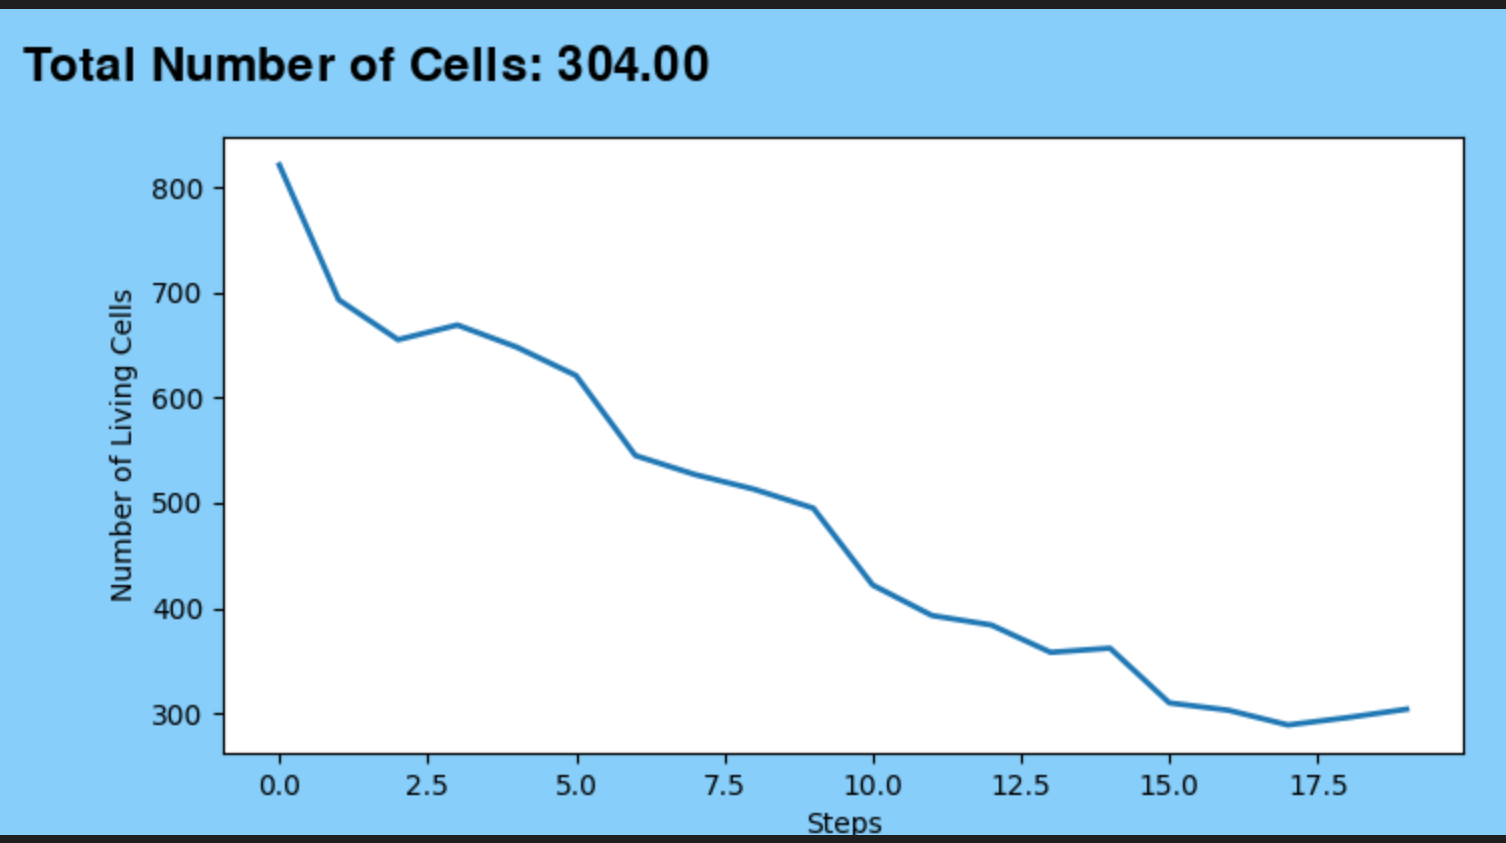

C'est le graphe du nombre de cellules vivantes en fonction de chaque itération

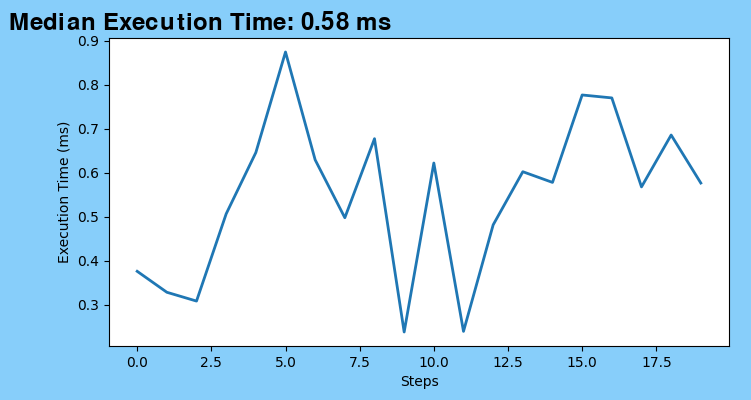

Ci-dessus nous retrouvons le temps d'execution en fonction de chaque itération


### La Grille : 
Nous avons opté pour une classe Grille () qui permettra de générer une grille avec des paramètres génériques tels que sa largeur et sa longueur (nombre de lignes / nombre de colonnes)
Il nous a paru également plus efficace d utiliser des méthodes pour créer, remplir, afficher et mettre à jour une grille de taille NxN. 
Ainsi, nous avons la définition de notre classe comme suit :  

### Evolution du jeu :
Pour se faire, les 3 règles suivantes doivent être respectées : 
- une cellule vivante survit si elle a 2 ou 3 voisins vivants.
- une cellule vivante meurt de solitude ou de surpopulation.
- une cellule morte peut devenir vivante si elle a exactement 3 voisins vivants.

Nous avons crée 2 méthodes pour respecter ces règles. 

#### Définir les voisins de chaque cellule dans la grille :  
* on crée un liste de cellules qui contiendra les cellules voisines et qui sera stocké dans les paramètres de la cellule. 
* on parcours chaque cellule de la grille en partant de la cellule à tester. 
* on parcours la liste en notant l état des cellules qu elle contient. 
* le nombre de cellules vivantes (= au voisines vivantes de la cellule à tester) sera stocké dans la cellule grâce au "self."

#### Faire évoluer la grille en respectant les 3 règles du jeu : 
   * on crée 2 listes vides pour stocker les cellules mortes et les cellules vivantes de la grille.
   * on recupère le nb de voisines vivantes de chaque cellule. 
   * on teste les 3 règles du jeu. 
   * on change l état de la cellule en fonction des règles. 
   * on affiche la nouvelle grille pour observer l évolution du jeu. 


In [ ]:
def update_board(self):
    kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    neighbors_count = scipy.signal.convolve2d(
        self.board, kernel, mode="same", boundary="fill", fillvalue=0
    )
    self.board = np.where(
        (self.board == 1) & ((neighbors_count < 2) | (neighbors_count > 3)),
        0,
        np.where(
            (self.board == 1) & ((neighbors_count == 2) | (neighbors_count == 3)),
            1,
            np.where((self.board == 0) & (neighbors_count == 3), 1, self.board),
        ),
    )

## 2- Le jeu en graphique: 

Nous avons crée deux graphes, un qui montre l'évolution des cellules en fonction de chaque itération, et un qui calcule le nombre de cellules dans le temps. 
Pour cela nous avons crée une fonction qui permettra de tracer ces deux graphes. Puis égalemment une fonction " état entre deux" qui permet de mettre à jour l'état de chaque graphe.

## 3- Analyse de l'évolution & courbes representatives: 



## 4- Le Lancement du jeu / Affichage: 
L utilisateur va lancer le jeu dans le fichier main.py 
A partir de là il aura plusieurs options : 
   * lancement en graphique avec affichage des courbes d'évolution
   * actualiser la grille manuellement ou non 
   * quitter la partie à tous moments 
Peut importe son choix il devra dans tous les cas entrer au clavier la taille de la grille souhaitée. 

L'implémentation de ces graphes dans le jeu donne cela : 

## 3- Analyse de l'évolution & courbes representatives: 

## 4- Le Lancement du jeu / Affichage: 
L utilisateur va lancer le jeu dans le fichier main.py 
A partir de là il aura plusieurs options : 
   * lancement en graphique avec affichage des courbes d'évolution
   * actualiser la grille manuellement ou non 
   * quitter la partie à tous moments 
Peut importe son choix il devra dans tous les cas entrer au clavier la taille de la grille souhaitée. 

Enfin, le jeu va évoluer petit à petit de façon plus ou moins autonome. 
Le joueur peut faire avancer le jeu grâce à un bouton (mode graphique) ou en tappant "q" sur son clavier (mode console).
Il est également possible de faire évoluer le jeu de manière autonome mais l évolution sera plus rapide et moins facile à analyser. 